# Shuffling

Simulations for a talk on shuffling.

* Introduction
* Is there information in the deck after shuffling?
  * How much information sticks around and for how long?
  * How can I use it to surprise, astonish, entertain?
  * How could it be used to cheat or prevent cheating at card games?
  * How much shuffling is needed for a deck to be _really_ shuffled?

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
# Read all the data.
riffle_data = pd.read_csv('riffle.csv')
overhand_data = pd.read_csv('overhand.csv')
avg_riffle_data = pd.read_csv('avg_riffle.csv')
avg_overhand_data = pd.read_csv('avg_overhand.csv')
riffle_over_data = pd.read_csv('riffle_over.csv')
avg_riffle_over_data = pd.read_csv('avg_riffle_over.csv')
avg_ifaro_data = pd.read_csv('avg_ifaro.csv')
out_faro_data = pd.read_csv('out_faro.csv')
in_faro_data = pd.read_csv('in_faro.csv')


In [3]:
display(riffle_data.head())

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,entropy
0,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,0.000000
1,31,32,33,0,1,2,3,4,5,34,...,26,27,48,28,29,49,30,50,51,1.823331
2,19,31,40,41,32,33,20,0,1,42,...,28,39,17,18,29,49,30,50,51,2.674073
3,19,7,31,8,40,41,24,9,25,45,...,29,49,30,50,34,35,23,51,6,3.232555
4,26,19,7,27,2,31,38,8,14,40,...,35,37,42,43,23,51,44,13,6,3.434651


In [4]:
# entropy = data_in['entropy']
# riffle_df = riffle_data.drop('entropy', 1)
# display(riffle_data.head())
# display(entropy)

In [5]:
def entropy_graph(df, x_label):
    fig, ax = plt.subplots()
    sns.lineplot(x='index', y='entropy', marker='o', data=df.reset_index())
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel=x_label, ylabel='Shannon Entropy')

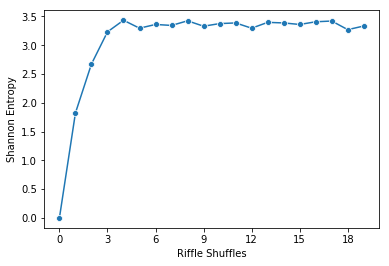

In [6]:
entropy_graph(riffle_data, 'Riffle Shuffles')

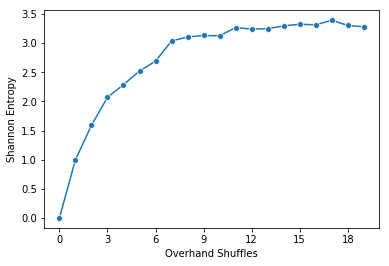

In [7]:
entropy_graph(overhand_data, 'Overhand Shuffles')

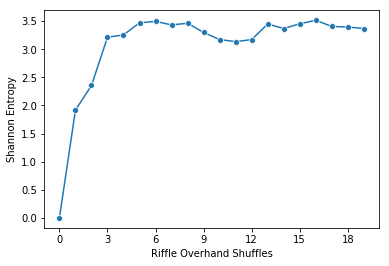

In [8]:
entropy_graph(riffle_over_data, 'Riffle Overhand Shuffles')

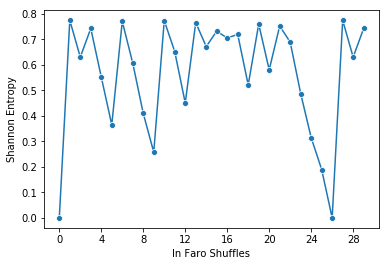

In [9]:
entropy_graph(in_faro_data, 'In Faro Shuffles')

In [10]:
def multi_shuffle_plot(data_series):
    npa_idx = pd.Series(np.array(list(range(1, 21)))) 
    df = npa_idx.to_frame().T
    df.rename(index = {0:'shuffle'}, inplace = True) 

    for name, s in data_series.items():
        df = pd.concat([df, s.to_frame().T])
        df.rename(index = {'entropy':name}, inplace = True) 
    
    df = df.T
    long_form = pd.melt(df, ['shuffle']) # .reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x='shuffle', y='value', hue='variable', marker='o', data=long_form)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(xlabel='Shuffles', ylabel='Shannon Entropy')

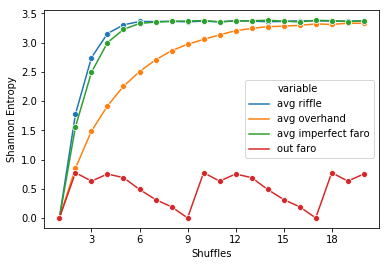

In [11]:
multi_shuffle_plot({
    'avg riffle': avg_riffle_data['entropy'], 
    'avg overhand': avg_overhand_data['entropy'],
    'avg imperfect faro': avg_ifaro_data['entropy'],
    'out faro': out_faro_data['entropy']
})

## References

* [Trailing the Dovetail Shuffle to its Lair](https://statweb.stanford.edu/~cgates/PERSI/papers/bayer92.pdf)
* [Stats exchange answer](https://stats.stackexchange.com/questions/78591/correlation-between-two-decks-of-cards)
* [How not to shuffle](https://www.i-programmer.info/programming/theory/2744-how-not-to-shuffle-the-kunth-fisher-yates-algorithm.html)
* [Ruby's Random](https://ruby-doc.org/core-2.4.0/Random.html)
* [The Science of Cheating at Cards](https://www.inventionandtech.com/content/science-cheating-cards-1?page=full)
* [Modern high-end card cheating](https://elie.net/blog/security/fuller-house-exposing-high-end-poker-cheating-devices/)
